In [2]:
%matplotlib inline
import numpy as np
import rasterio
import xarray as xr

## DEBUGGING!!!

In [2]:
src = rasterio.open('Stable_dh.tif')
data = src.read(1)

In [ ]:
data.shape

In [3]:
data = np.where(data == src.nodata, np.nan, data)

In [4]:
# Get coords
nx, ny = src.width, src.height
x0, y0 = src.bounds.left, src.bounds.top
dx, dy = src.res[0], -src.res[1]

coords = {'y': np.arange(start=y0, stop=(y0 + ny * dy), step=dy),
          'x': np.arange(start=x0, stop=(x0 + nx * dx), step=dx)}


In [5]:
dims = ('y', 'x')
#coords['band'] = (1)

In [6]:
attrs = {}
for attr_name in ['crs', 'affine', 'proj']:
    try:
        attrs[attr_name] = getattr(src, attr_name)
    except AttributeError:
        pass

/mnt/e/miniconda/envs/test_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: DeprecationWarning: 'src.affine' is deprecated.  Please switch to 'src.transform'. See https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
ds = xr.DataArray(data, dims=dims, name='dh', coords=coords, attrs=attrs).to_dataset()

In [ ]:
ds.dh

In [8]:
value=np.array(ds['dh'])


In [9]:
X=np.array(ds.coords['x']).reshape(1,1211)


In [10]:
Y=np.array(ds.coords['y']).reshape(1878,1)


In [11]:
ncol = 1211 # 1211
nrow = 1878 # 1878
A=np.ones(((ncol*nrow),3))
k=0
for i in range(ncol):
    for j in range(nrow):
        A[k,0]=X[0,i]
        A[k,1]=Y[j,0]
        A[k,2]=value[j,i]
        k=k+1


In [12]:
data = None

In [13]:
src = None

In [14]:
ds = None

In [15]:
attrs = None

In [16]:
coords = None

In [17]:
A = A[~np.isnan(A[:, 2])]

In [18]:
A.shape

(277342, 3)

#### This next statement is for reducing the number of data points, to see how it works with that amount of data.....

In [19]:
A = A[:30000]

In [ ]:
A.shape

In [ ]:
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt
OK = OrdinaryKriging(A[:,0],A[:,1],A[:,2], variogram_model='spherical',
                     verbose=True, enable_plotting=True)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Sill: 0.489490820635
Range: 5.11077293567
Nugget: 4.43988614424e-16 



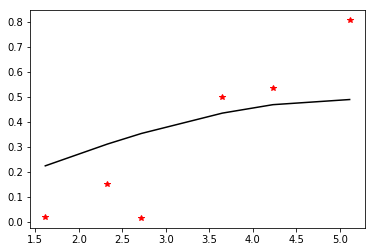

Calculating statistics on variogram model fit...


In [4]:
#test_data_available on pykrige github repo..
from pykrige.ok import OrdinaryKriging
import numpy as np
import pykrige.kriging_tools as kt

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='spherical',
                     verbose=True, enable_plotting=True)


In [ ]:
A.shape

In [ ]:
data.shape

In [ ]:
vars(OK)

In [ ]:
z, ss = OK.execute('grid', gridx, gridy, backend='C')